In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
!pip install text_preprocessing
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_email, remove_url, remove_punctuation, remove_number

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 8.5 MB/s eta 0:00:00


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import requests
from collections import Counter
import collections
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, make_scorer, ConfusionMatrixDisplay

In [ ]:
df_hanoi = pd.read_csv('clean_hanoi.csv')
df_danang = pd.read_csv('clean_danang.csv')

df_vn = pd.concat([df_hanoi, df_danang], ignore_index=True)
df_vn

,rating,date,travel_type,location,content,processed_text
0,4.0,2025-07,Friends,NaN,"Hà Nội We are really like here with good food,...",hà nội really like good food nice people frien...
1,5.0,2025-07,Couples,Australia,Great thing to do in Hanoi What a great thing ...,great thing hanoi great thing hanoi bella grea...
2,5.0,2025-07,NaN,NaN,The teacher was bright and had a lot of fun. T...,teacher bright lot fun food together meal grea...
3,5.0,2025-07,Friends,Singapore,Friendly and Happy Experience The class timing...,friendly happy experience class timing perfect...
4,5.0,2025-07,NaN,NaN,We had an absolutely amazing time at this cook...,absolutely amazing time cooking class sunny in...
...,...,...,...,...,...,...
49766,4.0,2023-01,Friends,Australia,App & Theatre Shows Here’s what’s important: 1...,app theatre show important raining bring umbre...
49767,4.0,2023-01,Solo,Australia,A Visit Worth the Effort This is a step back i...,visit worth effort step back time visiting imp...
49768,5.0,2023-01,Couples,NaN,Our Rehahn experience We came across the galle...,rehahn experience came across gallery hochimin...
49769,5.0,2023-01,Family,NaN,Subliming Vietnam through pictures The Gallery...,subliming vietnam picture gallery minute walki...


In [ ]:
df_bangkok = pd.read_csv('clean_bangkok.csv')
df_pattaya = pd.read_csv('clean_pattaya.csv')

df_tl = pd.concat([df_bangkok, df_pattaya], ignore_index=True)
df_tl

,rating,date,travel_type,location,content,processed_text
0,5,2025-07,Couples,NaN,Great tour Anna was a great tour guide. Alot o...,great tour anna great tour guide alot fun saw ...
1,5,2025-07,Family,NaN,"Boat tour Excellent excursion, very fun. Ken, ...",boat tour excellent excursion fun ken attentiv...
2,5,2025-07,Family,NaN,Thon buri canal trip Great insight into Thon B...,thon buri canal trip great insight thon buri c...
3,5,2025-07,Friends,NaN,"Great Tour Great guide, showed us lots of inte...",great tour great guide showed u lot interestin...
4,5,2025-07,Solo,NaN,Must do. It was a great experience. I would de...,must great experience would definitely guide f...
...,...,...,...,...,...,...
16847,5,2023-01,Family,Australia,Great day out Well run water park from start t...,great day well run water park start finish wen...
16848,5,2023-01,Friends,Canada,Awesome beach The beach goes on for ever - res...,awesome beach beach go ever restaurant bar lun...
16849,4,2023-01,Friends,UK,Rainbow Beach 25 must go .. Look out for Rainb...,rainbow beach must go look rainbow beach jomti...
16850,3,2023-01,NaN,Denmark,Beautiful building - but do not come for the a...,beautiful building come animal rowing boat san...


In [ ]:
#NLP clean function

def normalize_text(text):
    preprocess_functions = [to_lower, remove_email, remove_url, remove_punctuation, remove_number]
    normalized_text = preprocess_text(text, preprocess_functions)
    return normalized_text

def tokenize_text(text):
    return word_tokenize(text)

def cleaning_stopwords(text):
    stopword_list = {}
    stop_words = set(stopwords.words('english')).union(stopword_list)
    return [word for word in text if word not in stop_words]

def clean_text(text):
    normalized_text = normalize_text(text)
    tokenized_text = tokenize_text(normalized_text)
    cleaned_stopwords_text = cleaning_stopwords(tokenized_text)
    # stemmed_text = stemming_on_text(cleaned_stopwords_text)
    # lemmatized_text = lemmatize_text(cleaned_stopwords_text)
    return " ".join(cleaned_stopwords_text)

In [ ]:
df_vn['tokens'] = df_vn['content'].apply(clean_text)
df_tl['tokens'] = df_tl['content'].apply(clean_text)

**Handpicking intents sample**

In [ ]:
intent_revisit = ["come back", "return", "revisit", "again", "next time", "second visit",
        "will be back", "would love to return", "definitely return", "plan to come back",
        "visit again", "future visit", "looking forward", "not the last time",
        "stay longer next time", "back for more", "again soon", "already miss",
        "can't wait to return", "rebook"]

intent_not_revisit = ["never again", "won’t return", "not coming back", "once is enough", "no second time", "wouldn’t recommend returning", "not worth a revisit", "disappointed", "skip next time",
        "avoid in future", "won’t be back", "done with it", "poor experience", "nothing special",
        "underwhelming", "not what I expected", "regret going", "bad service", "waste of time",
        "overpriced"]

intent_recommend = ["highly recommend", "must visit", "should go", "don’t miss", "worth it", "should try", "best experience", "top choice", "perfect for", "would recommend", "ideal spot",
        "can’t go wrong", "tell your friends", "unforgettable", "stunning", "a gem",
        "amazing place", "well worth it", "definitely go", "favorite destination"]

intent_none = []

In [ ]:
def match_intent(text, keywords):
    text = str(text).lower()
    return any(kw.lower() in text for kw in keywords)

In [ ]:
df_revisit = df_vn[df_vn['content'].apply(lambda x: match_intent(x, intent_revisit))].head(150)
df_not_revisit = df_vn[df_vn['content'].apply(lambda x: match_intent(x, intent_not_revisit))].head(150)
df_recommend = df_vn[df_vn['content'].apply(lambda x: match_intent(x, intent_recommend))].head(150)

In [ ]:
# For 'no intent', exclude all matched rows and take first 150
matched_indices = pd.concat([df_revisit, df_not_revisit, df_recommend]).index
df_no_intent = df_vn[~df_vn.index.isin(matched_indices)].head(150)

In [ ]:
def label_intent(text):
    if match_intent(text, intent_revisit):
        return "revisit"
    elif match_intent(text, intent_not_revisit):
        return "not_revisit"
    elif match_intent(text, intent_recommend):
        return "recommend"
    else:
        return "no_intent"

df_vn['intent'] = df_vn['content'].apply(label_intent)

In [ ]:
df_vn['intent'].value_counts()
percent_df_vn = df_vn['intent'].value_counts(normalize=True) * 100
print(percent_df_vn)

intent
no_intent      64.159852
recommend      24.277190
revisit        10.819554
not_revisit     0.743405
Name: proportion, dtype: float64


In [ ]:
df_vn.to_excel('vn_intent.xlsx', index=False)

**Intent Detection - Model testing**

In [ ]:
# Load data
df_train = pd.read_csv("intent_label.csv", sep=';')
X = df_train['tokens']  # review text
y = df_train['intent']   # intent label

In [ ]:
# Set up 5-fold stratified CV
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Logistic Regression pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=10000)),
    ('clf', LogisticRegression(multi_class='multinomial', max_iter=1000))
])

# Store metrics
all_reports = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    log_cm = confusion_matrix(y_test, y_pred)

    log_accuracy = accuracy_score(y_test, y_pred)
    log_f1 = f1_score(y_test, y_pred, average='macro')
    log_f1_weighted = f1_score(y_test, y_pred, average='weighted')

    report = classification_report(y_test, y_pred, output_dict=True)

    all_reports.append(report)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 

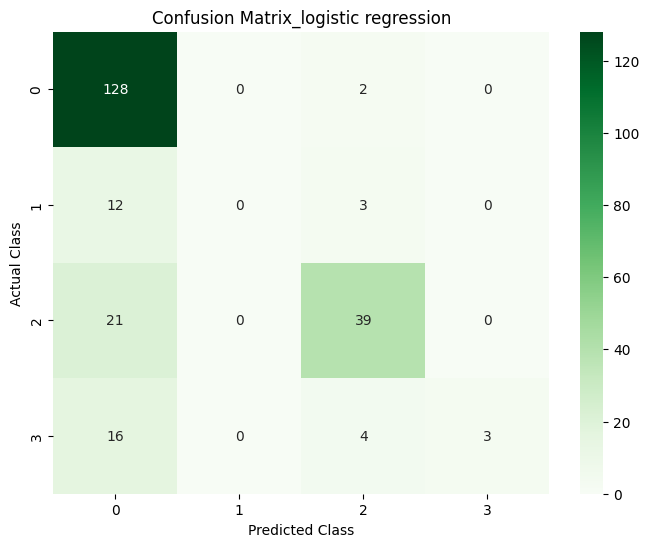

LOG Model Accuracy: 0.7456140350877193
LOG F1 Score (Macro): 0.4467169186224561
LOG F1 Score (Weighted): 0.6887935720869032


In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(log_cm, annot=True, fmt="d", cmap='Greens', cbar=True)
plt.title('Confusion Matrix_logistic regression')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(f"LOG Model Accuracy: {log_accuracy}")
print(f"LOG F1 Score (Macro): {log_f1}")
print(f"LOG F1 Score (Weighted): {log_f1_weighted}")

In [ ]:
#Optimization with MLP
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


model = MLPClassifier(hidden_layer_sizes=(5,), activation='tanh', max_iter=1000000000000, random_state=50)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
print('Accuracy with MLP:', accuracy_score(y_test, y_pred))

Accuracy with MLP: 0.6798245614035088


In [ ]:
# Naive Bayes pipeline
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=10000)),
    ('clf', MultinomialNB())
])

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    nb_pipeline.fit(X_train, y_train)
    nb_y_pred = nb_pipeline.predict(X_test)

    nb_cm = confusion_matrix(y_test, nb_y_pred)

    nb_accuracy = accuracy_score(y_test, nb_y_pred)
    nb_f1 = f1_score(y_test, nb_y_pred, average='macro')
    nb_f1_weighted = f1_score(y_test, nb_y_pred, average='weighted')

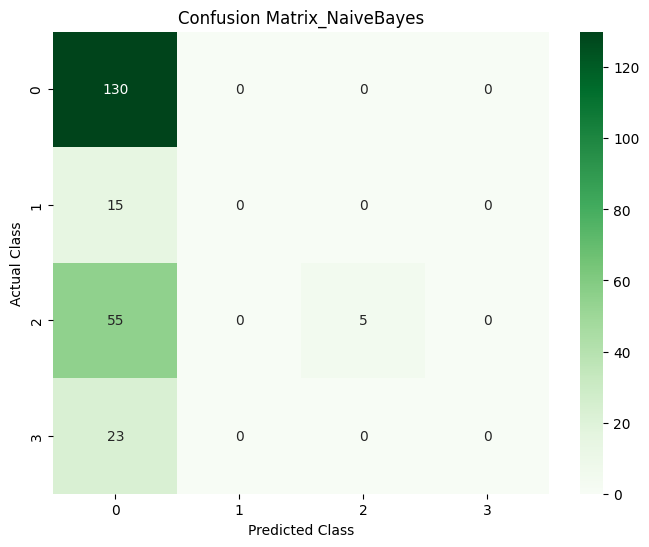

NB Model Accuracy: 0.5921052631578947
NB F1 Score (Macro): 0.22259751579864895
NB F1 Score (Weighted): 0.4604450765178363


In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap='Greens', cbar=True)
plt.title('Confusion Matrix_NaiveBayes')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(f"NB Model Accuracy: {nb_accuracy}")
print(f"NB F1 Score (Macro): {nb_f1}")
print(f"NB F1 Score (Weighted): {nb_f1_weighted}")

In [ ]:
# XGBoost pipeline
xgb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=10000)),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

from sklearn.preprocessing import LabelEncoder

# Encode the target variable y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y_encoded), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train_encoded, y_test_encoded = y_encoded[train_idx], y_encoded[test_idx]

    xgb_pipeline.fit(X_train, y_train_encoded)
    xgb_y_pred_encoded = xgb_pipeline.predict(X_test)

    # Decode predictions for confusion matrix and other metrics
    xgb_y_pred = label_encoder.inverse_transform(xgb_y_pred_encoded)
    xgb_y_test = label_encoder.inverse_transform(y_test_encoded)


    xgb_cm = confusion_matrix(xgb_y_test, xgb_y_pred)

    xgb_accuracy = accuracy_score(xgb_y_test, xgb_y_pred)
    xgb_f1 = f1_score(xgb_y_test, xgb_y_pred, average='macro')
    xgb_f1_weighted = f1_score(xgb_y_test, xgb_y_pred, average='weighted')

    report = classification_report(xgb_y_test, xgb_y_pred, output_dict=True)
    print(f"\n📂 Fold {fold} XGBoost Classification Report:")
    print(classification_report(xgb_y_test, xgb_y_pred))

    all_reports.append(report)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:47:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📂 Fold 1 XGBoost Classification Report:
              precision    recall  f1-score   support

   no_intent       0.84      0.96      0.90       130
 not_revisit       1.00      0.80      0.89        15
   recommend       0.89      0.86      0.88        59
     revisit       0.70      0.29      0.41        24

    accuracy                           0.86       228
   macro avg       0.86      0.73      0.77       228
weighted avg       0.85      0.86      0.84       228



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:47:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📂 Fold 2 XGBoost Classification Report:
              precision    recall  f1-score   support

   no_intent       0.84      0.95      0.89       129
 not_revisit       0.94      1.00      0.97        15
   recommend       0.94      0.73      0.82        60
     revisit       0.58      0.46      0.51        24

    accuracy                           0.85       228
   macro avg       0.82      0.79      0.80       228
weighted avg       0.85      0.85      0.84       228



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:47:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📂 Fold 3 XGBoost Classification Report:
              precision    recall  f1-score   support

   no_intent       0.84      0.96      0.90       129
 not_revisit       1.00      0.93      0.97        15
   recommend       0.89      0.82      0.85        60
     revisit       0.92      0.46      0.61        24

    accuracy                           0.87       228
   macro avg       0.91      0.79      0.83       228
weighted avg       0.87      0.87      0.86       228



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:47:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📂 Fold 4 XGBoost Classification Report:
              precision    recall  f1-score   support

   no_intent       0.86      0.97      0.91       129
 not_revisit       1.00      0.73      0.85        15
   recommend       0.88      0.83      0.85        60
     revisit       0.71      0.42      0.53        24

    accuracy                           0.86       228
   macro avg       0.86      0.74      0.78       228
weighted avg       0.86      0.86      0.85       228



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:47:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📂 Fold 5 XGBoost Classification Report:
              precision    recall  f1-score   support

   no_intent       0.92      0.95      0.93       130
 not_revisit       1.00      0.87      0.93        15
   recommend       0.89      0.92      0.90        60
     revisit       0.74      0.61      0.67        23

    accuracy                           0.90       228
   macro avg       0.89      0.83      0.86       228
weighted avg       0.90      0.90      0.90       228



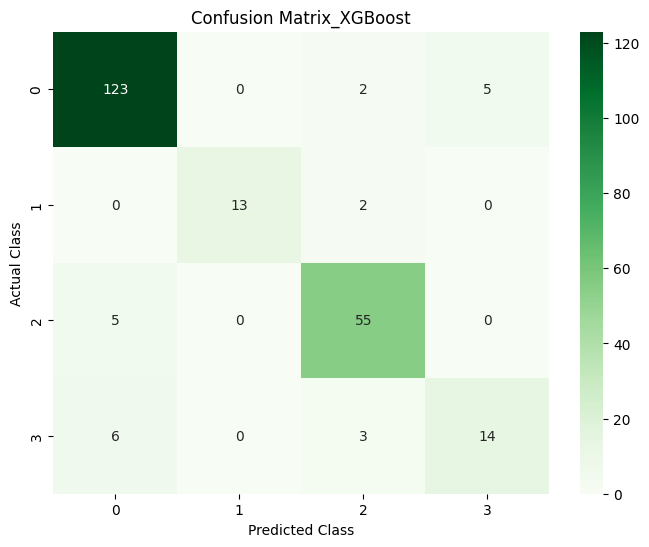

XGB Model Accuracy: 0.8991228070175439
XGB F1 Score (Macro): 0.857173905329643
XGB F1 Score (Weighted): 0.8969150397105531


In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap='Greens', cbar=True)
plt.title('Confusion Matrix_XGBoost')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

print(f"XGB Model Accuracy: {xgb_accuracy}")
print(f"XGB F1 Score (Macro): {xgb_f1}")
print(f"XGB F1 Score (Weighted): {xgb_f1_weighted}")

In [ ]:
# Create a dictionary to store the metrics
metrics_data = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'XGBoost'],
    'Accuracy': [log_accuracy, nb_accuracy, xgb_accuracy],
    'Macro F1 Score': [log_f1, nb_f1, xgb_f1],
    'Weighted F1 Score': [log_f1_weighted, nb_f1_weighted, xgb_f1_weighted]
}

# Create a pandas DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_data)

# Display the table
display(metrics_df)

,Model,Accuracy,Macro F1 Score,Weighted F1 Score
0,Logistic Regression,0.745614,0.446717,0.688794
1,Naive Bayes,0.592105,0.222598,0.460445
2,XGBoost,0.899123,0.857174,0.896915


**Intent Detection - Model fitting**

In [ ]:
count_vn = df_vn['predicted_intent'].value_counts()
percent_vn = df_vn['predicted_intent'].value_counts(normalize=True) * 100

df_vn_intent = pd.DataFrame({'count': count_vn, 'percent': percent_vn})
df_vn_intent

,count,percent
predicted_intent,,
no_intent,38451,77.255832
recommend,10148,20.389383
revisit,1065,2.139800
not_revisit,107,0.214985


In [ ]:
# Predict intent for df_vn
df_vn['predicted_intent'] = xgb_pipeline.predict(df_vn['tokens'])

# Predict intent for df_tl
df_tl['predicted_intent'] = xgb_pipeline.predict(df_tl['tokens'])

# Display the dataframes with predicted intents
display(df_vn.head())
display(df_tl.head())

,rating,date,travel_type,title,text,location,content,tokens,predicted_intent
0,4.0,2025-07,Friends,Hà Nội,"We are really like here with good food, nice p...",NaN,"Hà Nội We are really like here with good food,...",hà nội really like good food nice people frien...,0
1,5.0,2025-07,Couples,Great thing to do in Hanoi,What a great thing to do in Hanoi! Bella was s...,Australia,Great thing to do in Hanoi What a great thing ...,great thing hanoi great thing hanoi bella grea...,0
2,5.0,2025-07,NaN,The teacher was bright and had a lot of fun. T...,The teacher was bright and had a lot of fun. T...,NaN,The teacher was bright and had a lot of fun. T...,teacher bright lot fun food together meal grea...,0
3,5.0,2025-07,Friends,Friendly and Happy Experience,"The class timing is just perfect, Vy is patien...",Singapore,Friendly and Happy Experience The class timing...,friendly happy experience class timing perfect...,0
4,5.0,2025-07,NaN,We had an absolutely amazing time at this cook...,We had an absolutely amazing time at this cook...,NaN,We had an absolutely amazing time at this cook...,absolutely amazing time cooking class sunny in...,3


,rating,date,travel_type,title,text,location,content,tokens,predicted_intent
0,5,2025-07,Couples,Great tour,Anna was a great tour guide. Alot of fun. Saw ...,NaN,Great tour Anna was a great tour guide. Alot o...,great tour anna great tour guide alot fun saw ...,0
1,5,2025-07,Family,Boat tour,"Excellent excursion, very fun. Ken, our attent...",NaN,"Boat tour Excellent excursion, very fun. Ken, ...",boat tour excellent excursion fun ken attentiv...,0
2,5,2025-07,Family,Thon buri canal trip,Great insight into Thon Buri canal life. The g...,NaN,Thon buri canal trip Great insight into Thon B...,thon buri canal trip great insight thon buri c...,0
3,5,2025-07,Friends,Great Tour,"Great guide, showed us lots of interesting thi...",NaN,"Great Tour Great guide, showed us lots of inte...",great tour great guide showed us lots interest...,0
4,5,2025-07,Solo,Must do.,It was a great experience. I would definitely ...,NaN,Must do. It was a great experience. I would de...,must great experience would definitely guide f...,0


In [ ]:
# Translate numerical predicted intents back to word labels for df_vn
df_vn['predicted_intent'] = label_encoder.inverse_transform(df_vn['predicted_intent'])

# Translate numerical predicted intents back to word labels for df_tl
df_tl['predicted_intent'] = label_encoder.inverse_transform(df_tl['predicted_intent'])

# Display the dataframes with word labels for predicted intents
display(df_vn.head())
display(df_tl.head())

,rating,date,travel_type,title,text,location,content,tokens,predicted_intent
0,4.0,2025-07,Friends,Hà Nội,"We are really like here with good food, nice p...",NaN,"Hà Nội We are really like here with good food,...",hà nội really like good food nice people frien...,no_intent
1,5.0,2025-07,Couples,Great thing to do in Hanoi,What a great thing to do in Hanoi! Bella was s...,Australia,Great thing to do in Hanoi What a great thing ...,great thing hanoi great thing hanoi bella grea...,no_intent
2,5.0,2025-07,NaN,The teacher was bright and had a lot of fun. T...,The teacher was bright and had a lot of fun. T...,NaN,The teacher was bright and had a lot of fun. T...,teacher bright lot fun food together meal grea...,no_intent
3,5.0,2025-07,Friends,Friendly and Happy Experience,"The class timing is just perfect, Vy is patien...",Singapore,Friendly and Happy Experience The class timing...,friendly happy experience class timing perfect...,no_intent
4,5.0,2025-07,NaN,We had an absolutely amazing time at this cook...,We had an absolutely amazing time at this cook...,NaN,We had an absolutely amazing time at this cook...,absolutely amazing time cooking class sunny in...,revisit


,rating,date,travel_type,title,text,location,content,tokens,predicted_intent
0,5,2025-07,Couples,Great tour,Anna was a great tour guide. Alot of fun. Saw ...,NaN,Great tour Anna was a great tour guide. Alot o...,great tour anna great tour guide alot fun saw ...,no_intent
1,5,2025-07,Family,Boat tour,"Excellent excursion, very fun. Ken, our attent...",NaN,"Boat tour Excellent excursion, very fun. Ken, ...",boat tour excellent excursion fun ken attentiv...,no_intent
2,5,2025-07,Family,Thon buri canal trip,Great insight into Thon Buri canal life. The g...,NaN,Thon buri canal trip Great insight into Thon B...,thon buri canal trip great insight thon buri c...,no_intent
3,5,2025-07,Friends,Great Tour,"Great guide, showed us lots of interesting thi...",NaN,"Great Tour Great guide, showed us lots of inte...",great tour great guide showed us lots interest...,no_intent
4,5,2025-07,Solo,Must do.,It was a great experience. I would definitely ...,NaN,Must do. It was a great experience. I would de...,must great experience would definitely guide f...,no_intent


In [ ]:
print("Predicted Intent Distribution for df_vn:")
vn_intent_counts = df_vn['predicted_intent'].value_counts()
vn_intent_percentages = df_vn['predicted_intent'].value_counts(normalize=True) * 100
vn_intent_distribution = pd.DataFrame({'count': vn_intent_counts, 'percentage': vn_intent_percentages})
display(vn_intent_distribution)

print("\nPredicted Intent Distribution for df_tl:")
tl_intent_counts = df_tl['predicted_intent'].value_counts()
tl_intent_percentages = df_tl['predicted_intent'].value_counts(normalize=True) * 100
tl_intent_distribution = pd.DataFrame({'count': tl_intent_counts, 'percentage': tl_intent_percentages})
display(tl_intent_distribution)

Predicted Intent Distribution for df_vn:


,count,percentage
predicted_intent,,
no_intent,31887,64.067429
recommend,12284,24.681039
revisit,5132,10.311225
not_revisit,468,0.940307



Predicted Intent Distribution for df_tl:


,count,percentage
predicted_intent,,
no_intent,11411,67.713031
recommend,3298,19.570377
revisit,1689,10.022549
not_revisit,454,2.694042
